<a href="https://colab.research.google.com/github/itx-rahman/Email-Spam-Calssifier/blob/main/email_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Detecting Email Spam the upcommimg threat to the social media with NB Classifier***

# Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# i - Collecting the Data

In [ ]:
data = pd.read_csv('/content/mail_data.csv')

In [ ]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# ii - Collecting Information About Data

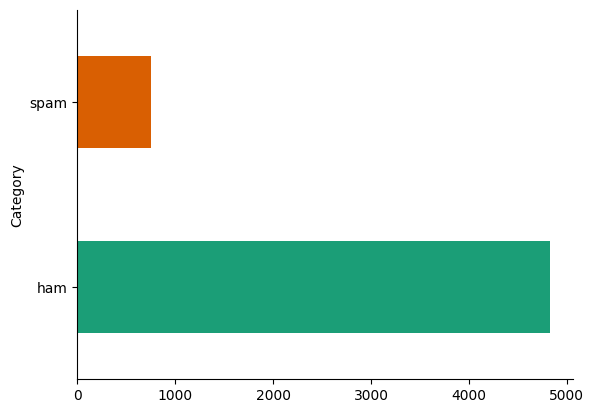

In [ ]:
data.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


# iii - Feature Selection

In [ ]:
x = data['Message']
y = data['Category']

In [ ]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

# iv - Data Pre-procesing

In [ ]:
# loading label encoder to label our categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

In [ ]:
# labeling the target column[category]
label = LabelEncoder()
y = label.fit_transform(y)

#  v - Splitting the Data for Trainning & Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# splitting the data into train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

In [ ]:
print('Shape of x:',x.shape,'\n',
      'Shape of y:',y.shape,'\n',
      'Shape of x_train.shape:',x_train.shape,'\n',
      'Shape of x_test.shape:',x_test.shape,'\n',
      'Shape of y_train.shape:',y_train.shape,'\n',
      'Shape of test.shape:',y_test.shape)

Shape of x: (5572,) 
 Shape of y: (5572,) 
 Shape of x_train.shape: (3900,) 
 Shape of x_test.shape: (1672,) 
 Shape of y_train.shape: (3900,) 
 Shape of test.shape: (1672,)


# vi - Features extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

# Fit the vectorizer to the training data and transform it
x_train_features = feature_extraction.fit_transform(x_train)

# Transform the test data using the fitted vectorizer
x_test_features = feature_extraction.transform(x_test)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
x_train_features

<3900x6896 sparse matrix of type '<class 'numpy.float64'>'
	with 30448 stored elements in Compressed Sparse Row format>

# vii -  Building the Model with Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()
model.fit(x_train_features,y_train)

MultinomialNB()

# viii - Predicting the model & Checking the Accuracy Score


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# prediction on trainning data
pred_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train,pred_on_training_data)

In [ ]:
print('Accuracy Score of Trainning:',accuracy_on_training_data)

Accuracy Score of Trainning: 0.981025641025641


In [ ]:
# prediction on test data
pred_on_testing_data = model.predict(x_test_features)
accuracy_on_testing_data = accuracy_score(y_test,pred_on_testing_data)

In [ ]:
print('Accuracy Score of Testing :',accuracy_on_testing_data)

Accuracy Score of Testing : 0.9683014354066986


# ix - Checking the Confusion Matrix

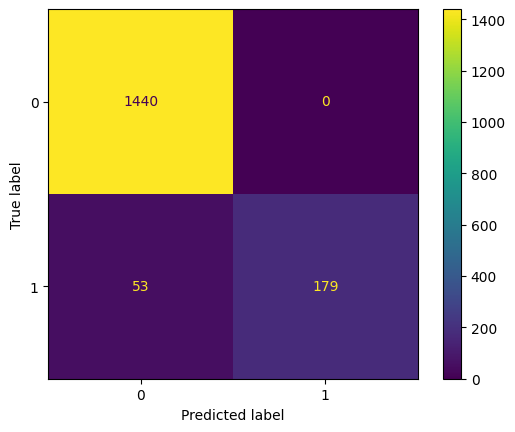

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test,pred_on_testing_data)

# Use the calculated confusion matrix for display
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

# **x - Predictive System**

In [ ]:
mail = ["Hi Nazim ul Rahman, I reviewed your assignment.In NB Classifier, transformations like Log, sqrt , sq etc are not applied on models. Please make the changes and resubmit the assignment.Create GITHUB  repositories and upload your codes there."]
final_data=feature_extraction.transform(mail)
predictions=model.predict(final_data)
if (predictions[0]==1):
  print("The e-mail is spam")
else:
  print("The e-mail is not spam)")
  # the output is not spam

The e-mail is not spam)


In [ ]:
mail = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
final_data=feature_extraction.transform(mail)
predictions=model.predict(final_data)
if (predictions[0]==1):
  print("The mail is spam")
else:
  print("The mail is Ham(not spam)")
  # the output is spam

The mail is spam
